In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# Load the data
df = pd.read_csv('merged_data.csv')
print("Initial shape:", df.shape)

# Remove duplicates
df = df.drop_duplicates(keep='first')
print("Shape after duplicate removal:", df.shape)

# Basic info and statistics
print("Data Info:")
print(df.info())

print("Summary Statistics:")
print(df.describe())

# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)


Initial shape: (30376, 5)
Shape after duplicate removal: (22024, 5)
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 22024 entries, 0 to 30375
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        22024 non-null  object 
 1   Frequency   22024 non-null  float64
 2   Amplitude   22024 non-null  int64  
 3   PulseWidth  22024 non-null  float64
 4   AOA         22024 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.0+ MB
None
Summary Statistics:
          Frequency     Amplitude    PulseWidth           AOA
count  22024.000000  22024.000000  22024.000000  22024.000000
mean    3668.021372    -47.014303     30.275486    199.339266
std     1330.237766     17.991747     68.518667    109.670768
min     1367.350000   -127.000000      1.390000      0.000000
25%     1614.840000    -53.000000      4.480000    118.000000
50%     4400.630000    -45.000000      9.250000    202.000000
75%     44

In [2]:
# Generate and save a detailed profile report
profile = ProfileReport(df, title="Data Analysis Report", explorative=True)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 324.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

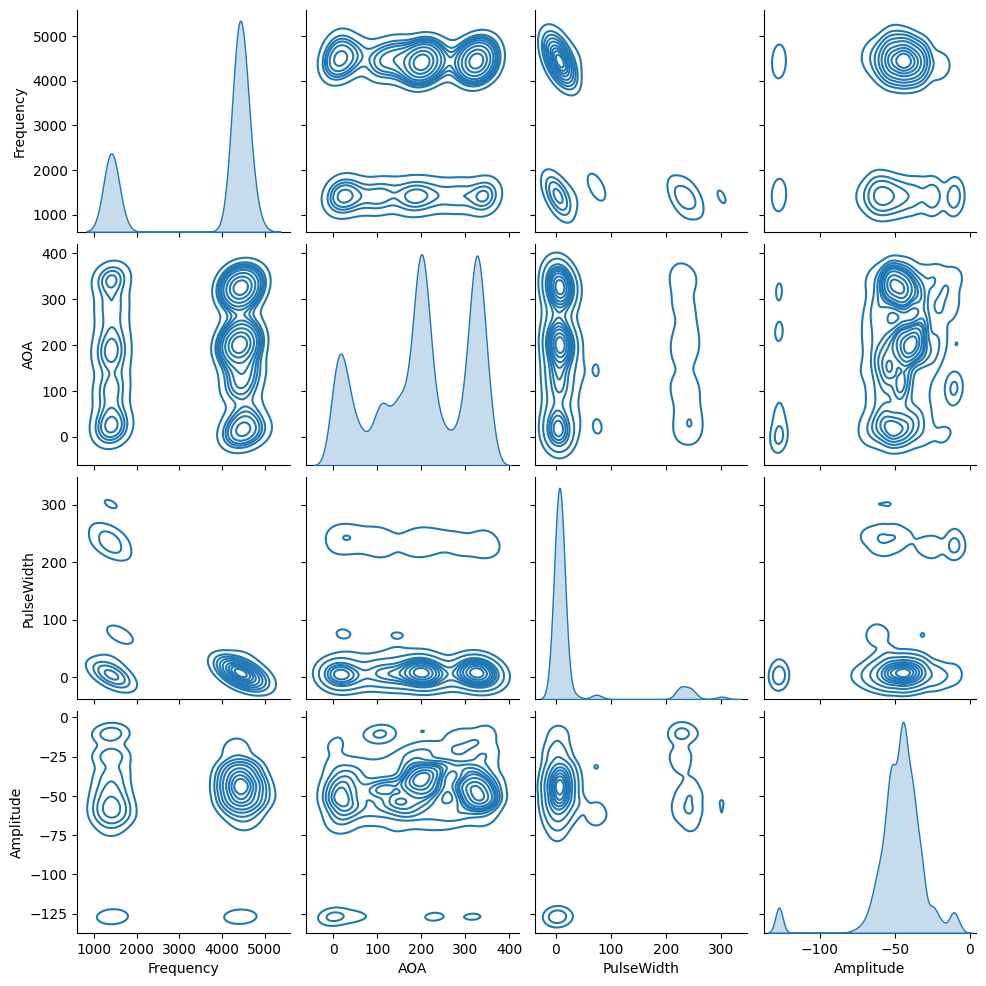

In [3]:
import seaborn as sns
%matplotlib inline
df_2=df[['Frequency','AOA','PulseWidth','Amplitude']]
sns.pairplot(df_2,kind="kde")


In [4]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
print(f"Missing value percentage:{missing_percentages}")

Missing value percentage:Name          0.0
Frequency     0.0
Amplitude     0.0
PulseWidth    0.0
AOA           0.0
dtype: float64


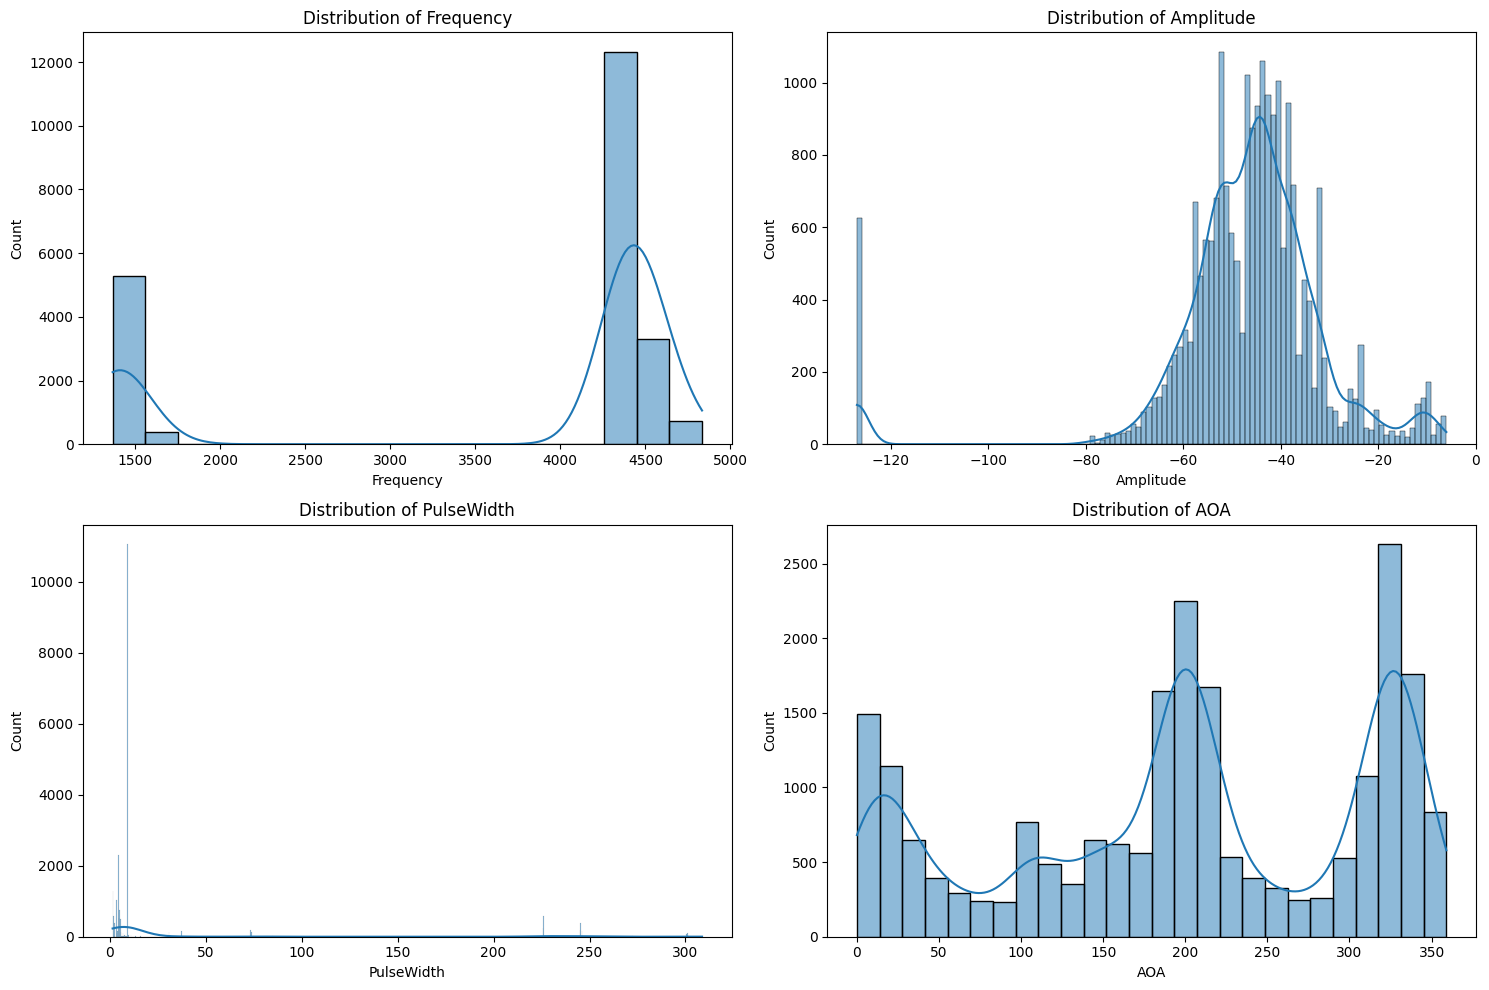

In [5]:
# Histograms and density plots for numerical features
numerical_features = ['Frequency', 'Amplitude', 'PulseWidth', 'AOA']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

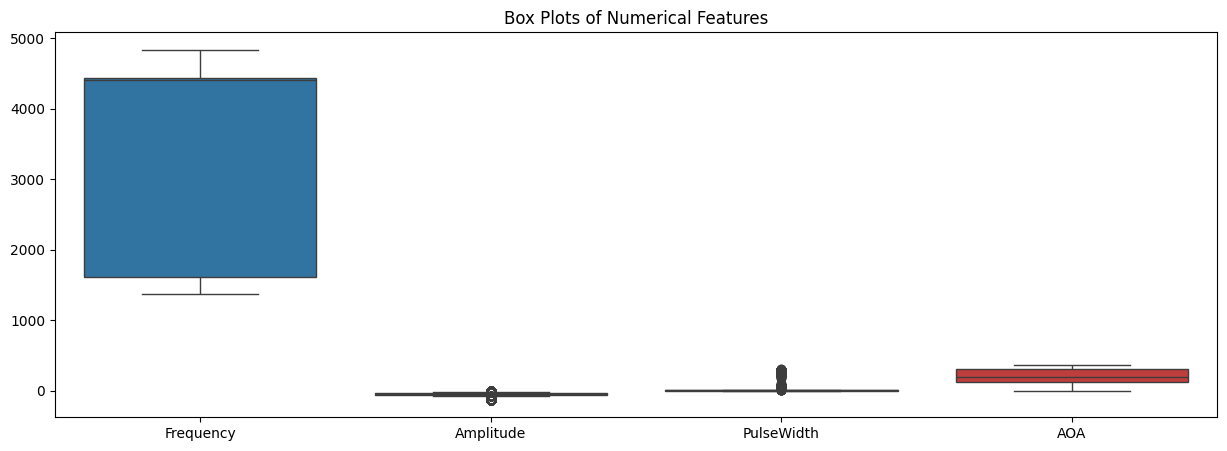

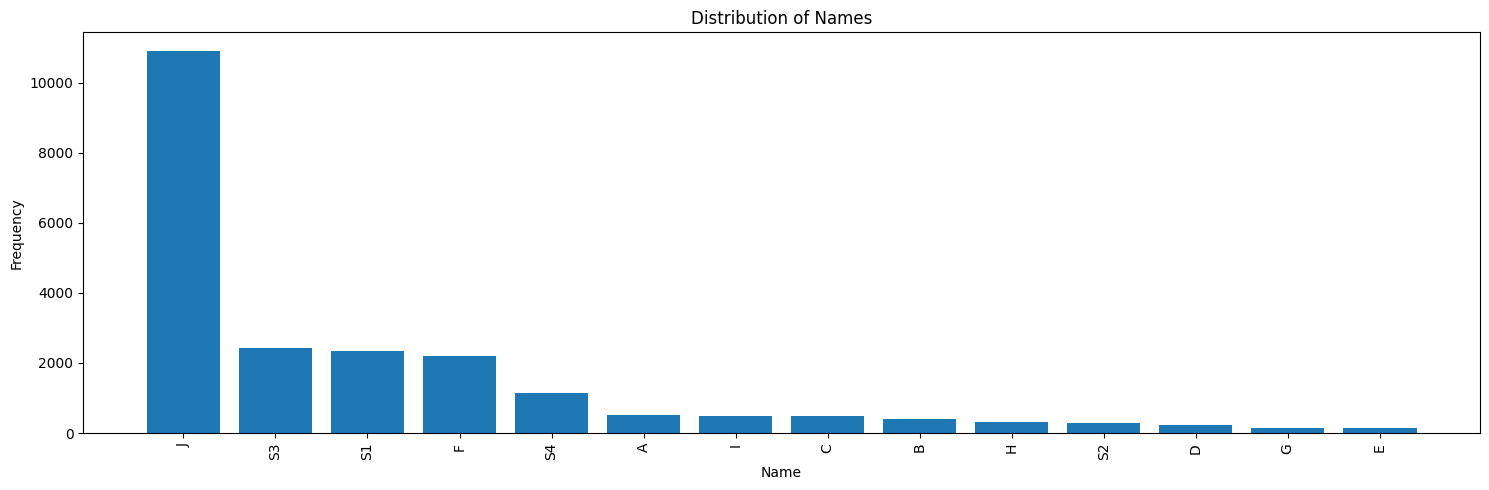

In [6]:
# Box plots for numerical features
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.show()

# Bar chart for the categorical feature 'Name'
plt.figure(figsize=(15, 5))
name_counts = df['Name'].value_counts()
plt.bar(name_counts.index, name_counts.values)
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.title('Distribution of Names')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

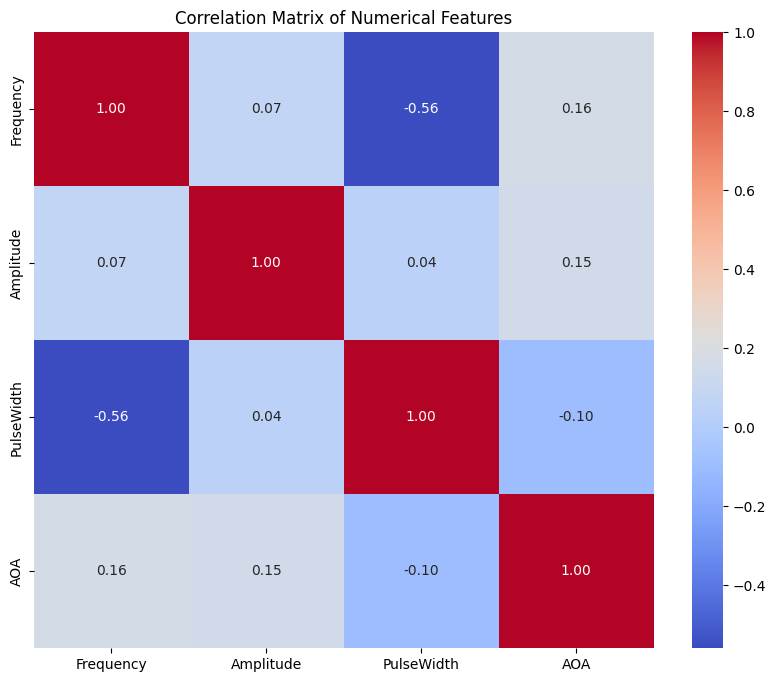

Analysis of Correlation Matrix:
- Frequency and PulseWidth have a significant correlation: -0.56


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = ['Frequency', 'Amplitude', 'PulseWidth', 'AOA']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze the heatmap and identify significant correlations
print("Analysis of Correlation Matrix:")
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.5:
            print(f"- {numerical_features[i]} and {numerical_features[j]} have a significant correlation: {correlation:.2f}")
        elif abs(correlation) > 0.3:
            print(f"- {numerical_features[i]} and {numerical_features[j]} have a moderate correlation: {correlation:.2f}")

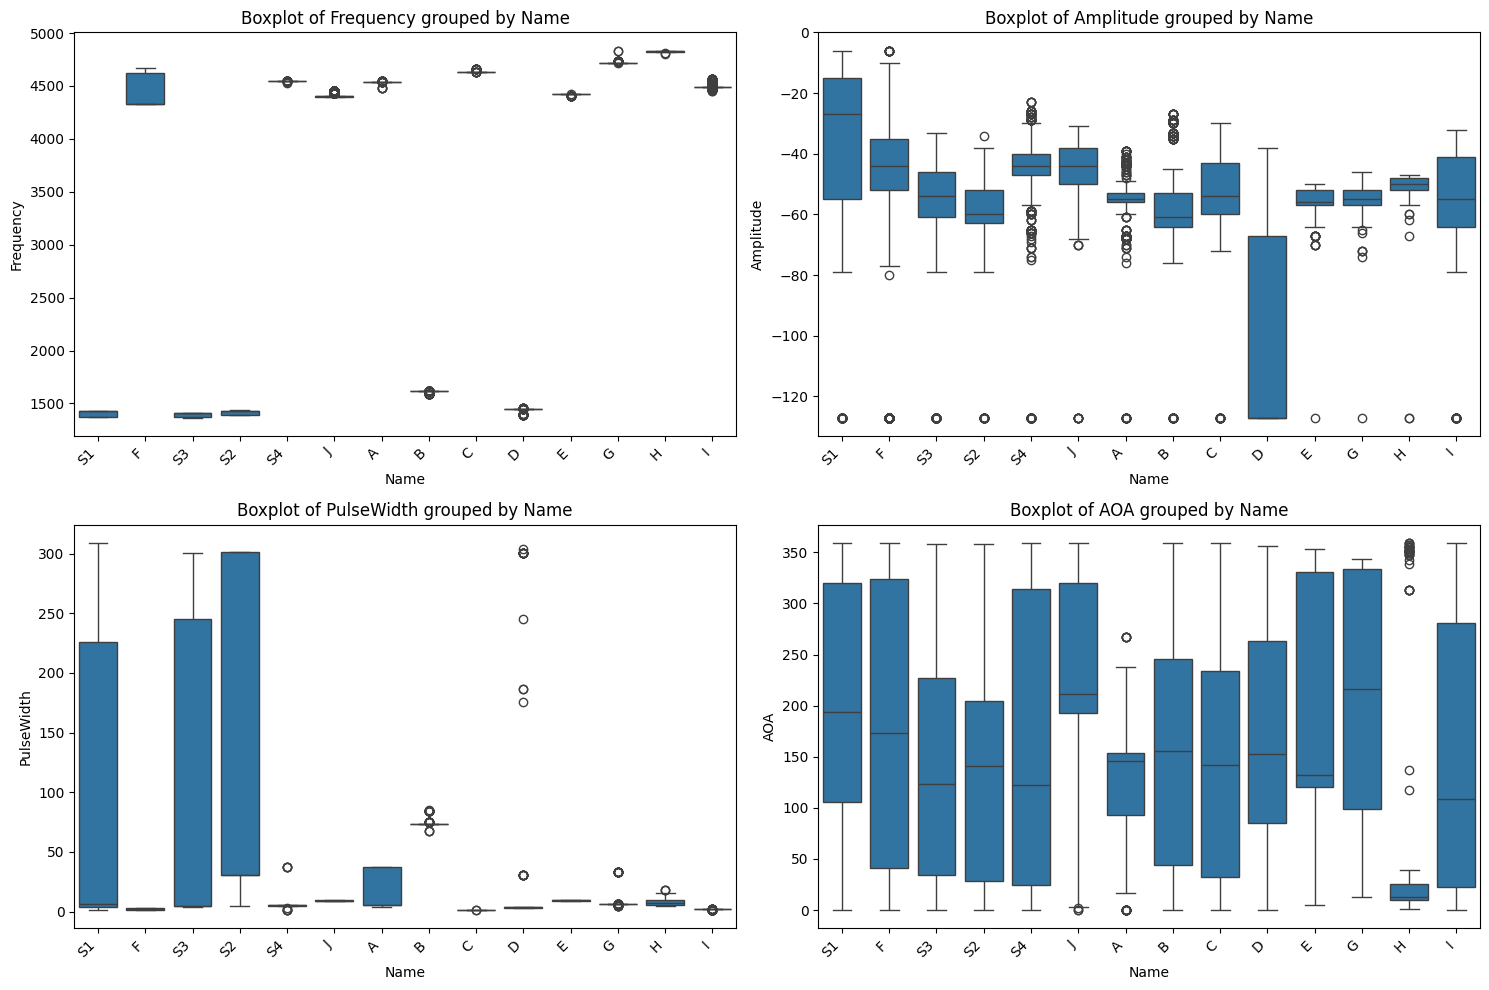

In [9]:
# Boxplots grouped by 'Name' category
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Name', y=col, data=df)
    plt.title(f'Boxplot of {col} grouped by Name')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Number of Zeroes in every column

In [10]:
##Number of zeroes of each column
for column in df.columns:
    print(f"Number of zeroes of column {column}: {(df[column] == 0).sum()}")

Number of zeroes of column Name: 0
Number of zeroes of column Frequency: 0
Number of zeroes of column Amplitude: 0
Number of zeroes of column PulseWidth: 0
Number of zeroes of column AOA: 451


In [ ]:
## Removing those zeroes
df=df[df['AOA']!=0]

In [15]:
df.shape

(21573, 5)

In [16]:
df.head()

,Name,Frequency,Amplitude,PulseWidth,AOA
0,S1,1426.000,-20,226.09,281
1,S1,1425.405,-20,5.98,281
2,S1,1425.590,-20,5.98,283
4,S1,1376.125,-20,235.39,283
5,S1,1425.755,-20,235.39,283


In [17]:
df.to_csv('cleaned.csv',index=False)

In [18]:
df.shape

(21573, 5)